In [1]:
# usual imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import tensorflow 
import tensorflow as tf
# You can avoid the long names by using
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
%matplotlib inline

In [2]:
# we set a random seed to ensure our results are reproducible 
seed = 399
np.random.seed(seed)
tf.random.set_seed(seed)

## Multilayer Perceptron
We're using a slightly altered version of heart data from the previous exercise to illustrate a concept. Notice how now a single sigmoid will not be able to do an acceptible job of classification.

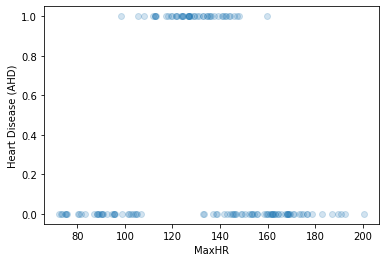

In [3]:
altered_heart_data = pd.read_csv('data/altered_heart_data.csv')
x = altered_heart_data.MaxHR.values
y = altered_heart_data.AHD.values
plt.scatter(x, y, alpha=0.2)
plt.xlabel('MaxHR')
plt.ylabel('Heart Disease (AHD)');

Now we will use Keras to construct our MLP. You need only add the output layer.
Each step is described in the comments. We will go into more detail on Keras in the 1st lab.

In [4]:
## First we instantiate a Keras model
MLP = models.Sequential(name='MLP')

## [Adding Layers]
# Next we add a hidden layer with 2 nodes and a sigmoid activation function
MLP.add(layers.Dense(2, activation='sigmoid', input_shape=(1,), name='hidden'))

# Now add the output layer
# Use the code above as an example. You only need to change the arguments
# Choose number of nodes and activation and name it 'output'
# (the input shape will be infered from the hidden layer's output shape)
MLP.add(layers.Dense(1,  activation='sigmoid', name='output'))

# [Compilation]
# here we set the loss to be minimized and a metric to monitor when fitting the MLP
MLP.compile(loss='binary_crossentropy', metrics=['accuracy'])

This simple model benefits from setting some reasonable initial weights.
During fitting these weights will be optimized.

In [5]:
# get original random weights
weights = MLP.get_weights()
# hidden layer
weights[0][0]=np.array([ 3.1,-3.2]) #weights 
weights[1]=np.array([-350.,402.]) # biases
# output layer 
weights[2]=np.array([[1.29],[1.11]]) # weights
weights[3] = np.array([-1.11])    # bias
# update weights
MLP.set_weights(weights)

You should always inspect your Keras model with the `summary()` method. Note the number of parameters in each layer:

Hidden has 4 - it contains 2 nodes each with a weight and bias.

Output has 3 - it has a weight for each node in the previous layer plus a bias term.

In [6]:
MLP.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 4         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


Now we fit (or 'train') the MLP on our data, updating the weights to minimize the loss we specified in the call to `compile()`. (There will be more details on how this update happens in future lectures).

One full training cycle on our data is called an 'epoch.' Usually multiple epochs are required before a model converges. Specify a number of epochs to train for.

In [7]:
MLP.fit(x, y, epochs=100);

Epoch 1/100
5/5 [==============================] - 0s 698us/step - loss: 0.6679 - accuracy: 0.5655
Epoch 2/100
5/5 [==============================] - 0s 524us/step - loss: 0.6618 - accuracy: 0.5655
Epoch 3/100
5/5 [==============================] - 0s 606us/step - loss: 0.6565 - accuracy: 0.5655
Epoch 4/100
5/5 [==============================] - 0s 582us/step - loss: 0.6513 - accuracy: 0.5655
Epoch 5/100
5/5 [==============================] - 0s 598us/step - loss: 0.6463 - accuracy: 0.5655
Epoch 6/100
5/5 [==============================] - 0s 597us/step - loss: 0.6417 - accuracy: 0.5655
Epoch 7/100
5/5 [==============================] - 0s 634us/step - loss: 0.6376 - accuracy: 0.5655
Epoch 8/100
5/5 [==============================] - 0s 618us/step - loss: 0.6340 - accuracy: 0.5655
Epoch 9/100
5/5 [==============================] - 0s 601us/step - loss: 0.6309 - accuracy: 0.5655
Epoch 10/100
5/5 [==============================] - 0s 627us/step - loss: 0.6283 - accuracy: 0.5655
Epoch 11/

We can plot the training history and observe that as the weights were updated our loss declined and the accuracy improved.

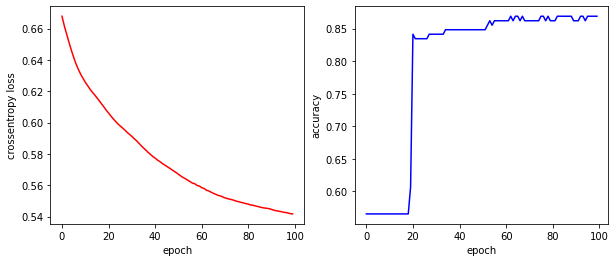

In [8]:
history = MLP.history.history
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(history['loss'], c='r', label='loss')
ax[0].set_ylabel('crossentropy loss')
ax[1].plot(history['accuracy'], c='b')
ax[1].set_ylabel('accuracy')
for axis in ax:
    axis.set_xlabel('epoch')

Let's look at the individual outputs of the 2 nodes in the hidden layer.

In [9]:
# create xs for input to predict on
x_linspace = np.linspace(np.min(x), np.max(x), 500) 

# get output from the hidden layer nodes
hidden = models.Model(inputs=MLP.input, outputs=MLP.get_layer('hidden').output)
hidden_pred = hidden.predict(x_linspace)

h1_pred = hidden_pred[:,0]
h2_pred = hidden_pred[:,1]

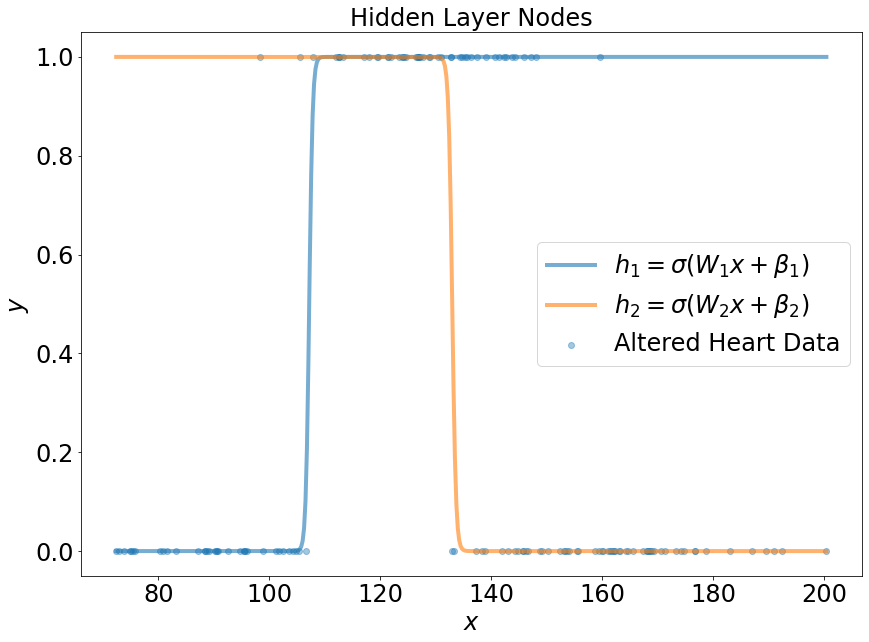

In [10]:
#Plot output from h1 & h2
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.scatter(x, y, alpha=0.4, label='Altered Heart Data')
ax.plot(x_linspace, h1_pred, lw=4, alpha=0.6, label=r'$h_1 = \sigma(W_1x+\beta_1)$')
ax.plot(x_linspace, h2_pred, lw=4, alpha=0.6, label=r'$h_2 = \sigma(W_2x+\beta_2)$')

# Set title
ax.set_title('Hidden Layer Nodes', fontsize=24)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best'); # Create a legend and make it big enough to read

We can see that each node in the hidden layer indeed outputs a different sigmoid.

Now let's look at how they are combined by the output layer.

In [11]:
# get output layer predictions
y_pred = MLP.predict(x_linspace)

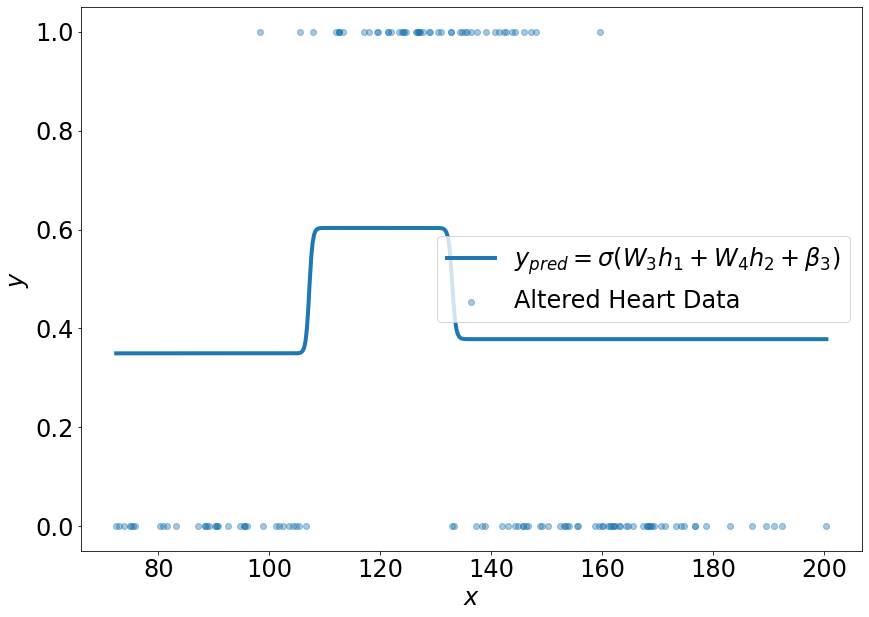

In [12]:
# plot predictions
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.scatter(x, y, alpha=0.4, label=r'Altered Heart Data')
ax.plot(x_linspace, y_pred, lw=4, label=r'$y_{pred} = \sigma(W_3h_{1} + W_4h_{2}+\beta_{3})$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best'); # Create a legend and make it big enough to read

Finally, let's compare the MLP's accuracy to a baseline that always predicts the majority class. Try and see if you can get over 80% accuracy (86%+ is possible). You may need to change the number of epochs above and rerun the notebook.

In [13]:
def accuracy(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    return sum(y_true == (y_pred >= 0.5).astype(int))/len(y_true)

In [14]:
### edTest(test_performance) ###
final_pred = MLP.predict(x).flatten()

baseline_acc = accuracy(y, np.zeros(len(y))) # predictions are all zeros
MLP_acc = accuracy(y, final_pred)
print(f'Baseline Accuracy: {baseline_acc:.2%}')
print(f'MLP Accuracy: {MLP_acc:.2%}')

Baseline Accuracy: 65.52%
MLP Accuracy: 86.90%
